In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# Climate change in Poland over the course of years 1960-2019

data source: https://data.world/hdx/72d07c30-717a-4bc1-910e-c117eeb1ada0

## Introduction

This project aims to answear the question of how fast climate change proceeds and what effects it brings. I'll compare individual indicators listed below and try to conduct regression of CO2 emission depending on energy consumption and other environmental factors. I'll see how, if there are any, big are correlations between changes observed in nature (droughts, size of crops) and CO2 emissions. I'll build a model which tries to forecast CO2 emission in the near future. 

In [325]:
df = pd.read_csv('climate-change_pol.csv')
#--------preprocessing data--------
df = df.drop(index=0)
df = df.drop(columns="indicator_code")
df['value'] = pd.to_numeric(df['value'])
df['year'] = pd.to_numeric(df['year'])
#-----------------------------------------
df.dtypes

country_name       object
country_ISO3       object
year              float64
indicator_name     object
value             float64
dtype: object

In [326]:
df

,country_name,country_ISO3,year,indicator_name,value
1,Poland,POL,2016.0,Agricultural land (sq. km),143740.000
2,Poland,POL,2015.0,Agricultural land (sq. km),143710.000
3,Poland,POL,2014.0,Agricultural land (sq. km),144240.000
4,Poland,POL,2013.0,Agricultural land (sq. km),144100.000
5,Poland,POL,2012.0,Agricultural land (sq. km),145290.000
...,...,...,...,...,...
1856,Poland,POL,1964.0,Urban population (% of total population),49.727
1857,Poland,POL,1963.0,Urban population (% of total population),49.326
1858,Poland,POL,1962.0,Urban population (% of total population),48.926
1859,Poland,POL,1961.0,Urban population (% of total population),48.527


I suspect that over the years energy consumption went significantly up which resulted in bigger CO2 and other greenhouse gases emission. This in turn impacted frequency of occuring events such as droughts, crop dimunition and migration from villages to cities in search of earnings other those from farming.

## Basic statistics

### List of all indicators

In [327]:
names = df.indicator_name.unique()
names

array(['Agricultural land (sq. km)', 'Agricultural land (% of land area)',
       'Arable land (% of land area)',
       'Rural land area where elevation is below 5 meters (sq. km)',
       'Rural land area where elevation is below 5 meters (% of total land area)',
       'Urban land area where elevation is below 5 meters (sq. km)',
       'Urban land area where elevation is below 5 meters (% of total land area)',
       'Land area where elevation is below 5 meters (% of total land area)',
       'Forest area (sq. km)', 'Forest area (% of land area)',
       'Agricultural irrigated land (% of total agricultural land)',
       'Average precipitation in depth (mm per year)',
       'Cereal yield (kg per hectare)', nan,
       'Access to electricity (% of population)',
       'Renewable energy consumption (% of total final energy consumption)',
       'CO2 intensity (kg per kg of oil equivalent energy use)',
       'CO2 emissions from gaseous fuel consumption (kt)',
       'CO2 emissions 

In [328]:
names.size

53

### average, min, max, std

In [329]:
#function returning basic statisctics about given indicator
def ind_desc(ind):
    print(ind)
    df_=df[df.indicator_name==ind]
    return df_['value'].describe()

In [330]:
ind_desc('CO2 emissions from liquid fuel consumption (kt)')

CO2 emissions from liquid fuel consumption (kt)


count       57.000000
mean     41915.354000
std      16852.291583
min       5984.544000
25%      34422.129000
50%      44906.082000
75%      55877.746000
max      66468.042000
Name: value, dtype: float64

## Plots

### functions drawing plots

In [331]:
#function drawing a plot
#parameters:
#ind = indicator name
#plot = plot type

def drawplot(ind, plot):
    plt.figure(figsize=(25,5))
    
    df_=df[df.indicator_name==ind]
    x=df_.year
    y=df_.value
    
    plt.title(ind)
    plt.xlabel('year')
    plt.ylabel('value')
    plt.grid()
    
    if plot=='plot':
        plt.plot(x,y)
    if plot=='scat':
        plt.scatter(x,y)
    if plot=='hist':
        plt.hist(x)

In [332]:
#function drawing plots of 2 indicators
def draw2plots(ind1, ind2):
    plt.figure(figsize=(25,5))
    
    #1
    df1 = df[df.indicator_name==ind1]
    df1=df1.sort_values(by='year', ascending=True)
    x1=df1.year
    y1=df1.value
    
    #2
    df2 = df[df.indicator_name==ind2]
    df2=df2.sort_values(by='year', ascending=True)
    x2=df2.year
    y2=df2.value
    
    #plots
    plt.plot(x1,y1, label=ind1)
    plt.plot(x2,y2, label=ind2)
    plt.legend()
    plt.grid()
    plt.xlabel('year')
    plt.ylabel('value')

In [333]:
#function drawing 2 plots of 2 indicators on different charts
def draw2plots_diff(ind1, ind2):
    drawplot(ind1, 'plot')
    drawplot(ind2, 'plot')

### Analysis

#### environment

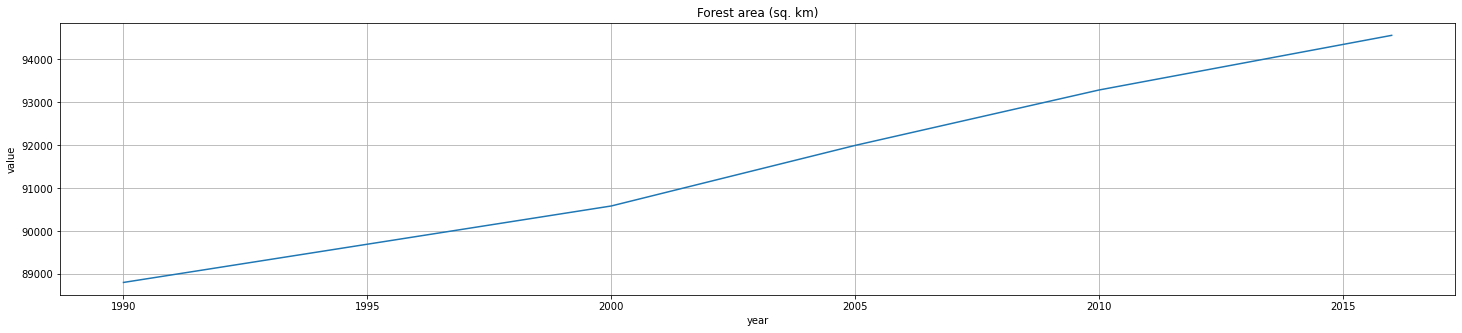

In [334]:
drawplot('Forest area (sq. km)','plot')

Forestal area increased over the years.

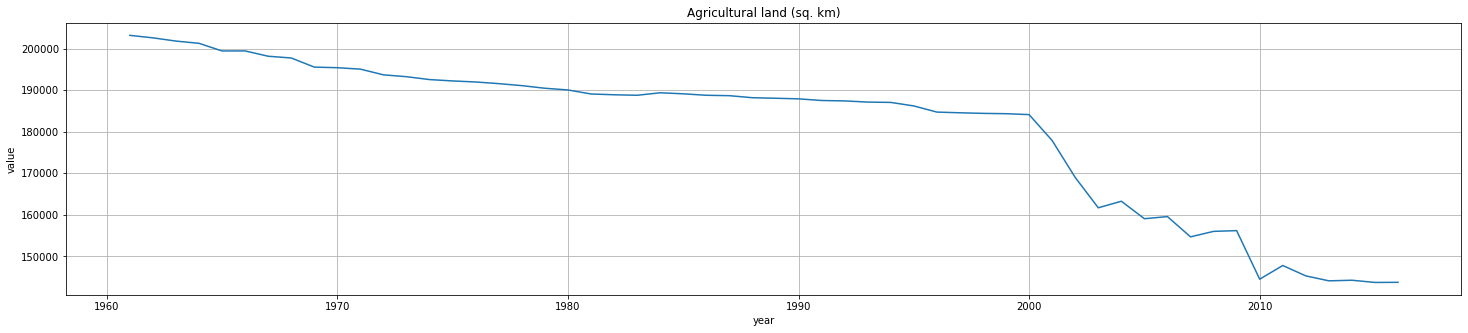

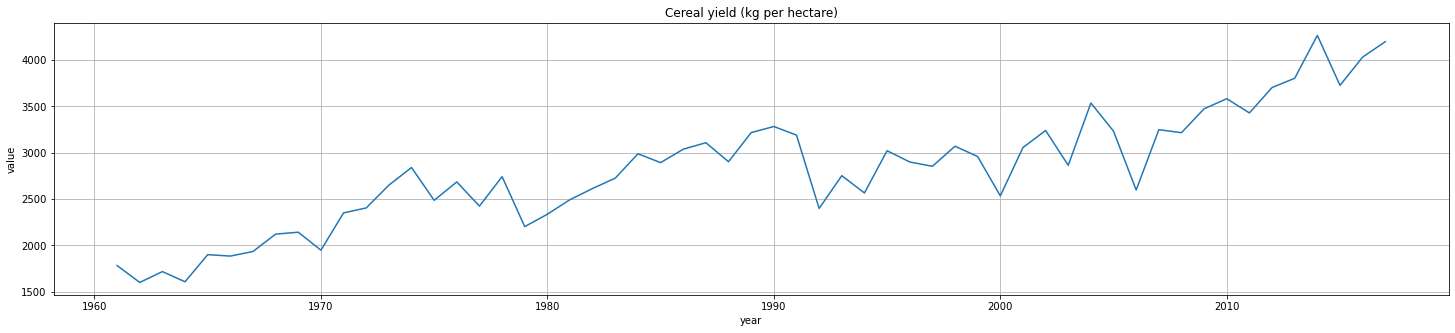

In [335]:
draw2plots_diff('Agricultural land (sq. km)', 'Cereal yield (kg per hectare)')

Although agricultural land was diminishing, the cereal yield was getting bigger.

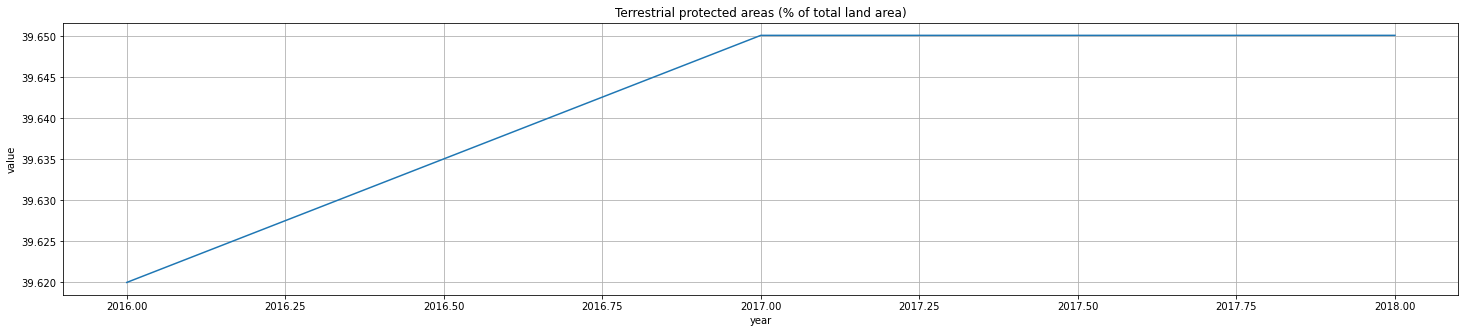

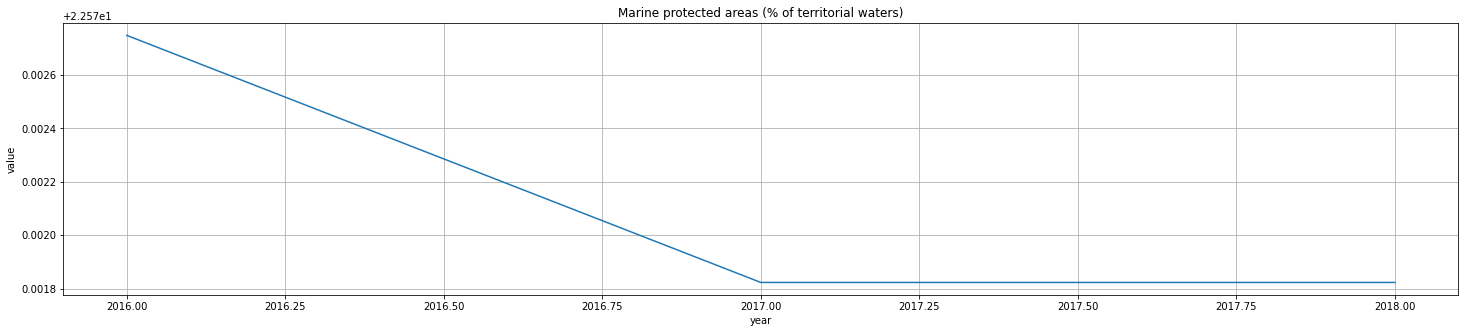

In [336]:
draw2plots_diff('Terrestrial protected areas (% of total land area)',
       'Marine protected areas (% of territorial waters)')

There was an increase in terrestrial protected areas but decrease in marine ones, which wasn't big to begin with anyway.

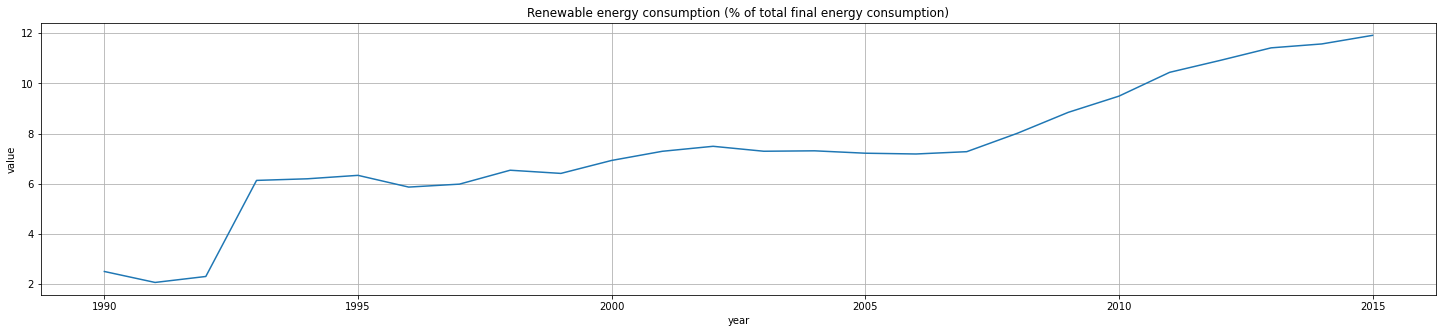

In [337]:
drawplot('Renewable energy consumption (% of total final energy consumption)','plot')

Since the beginning of transformation era in 1989 the use of renawable enrgies got bigger, from about 2% to about 12% in 2015.

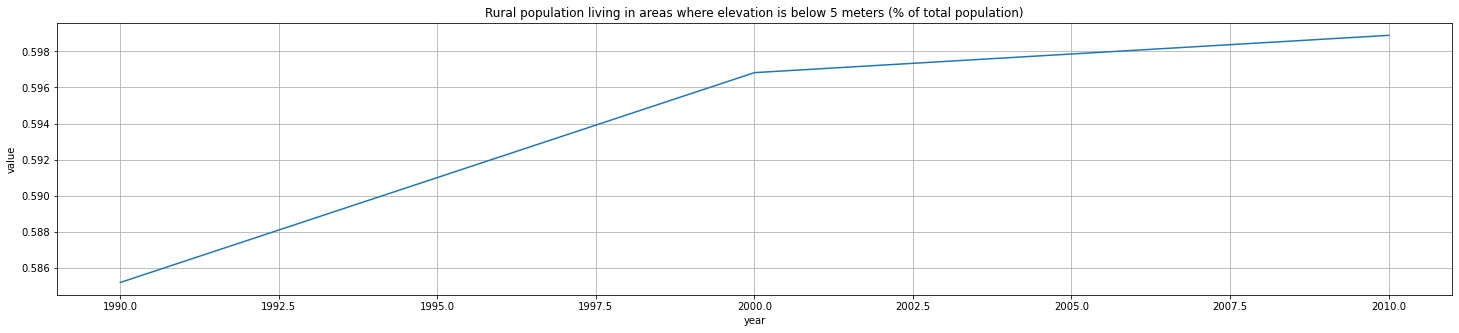

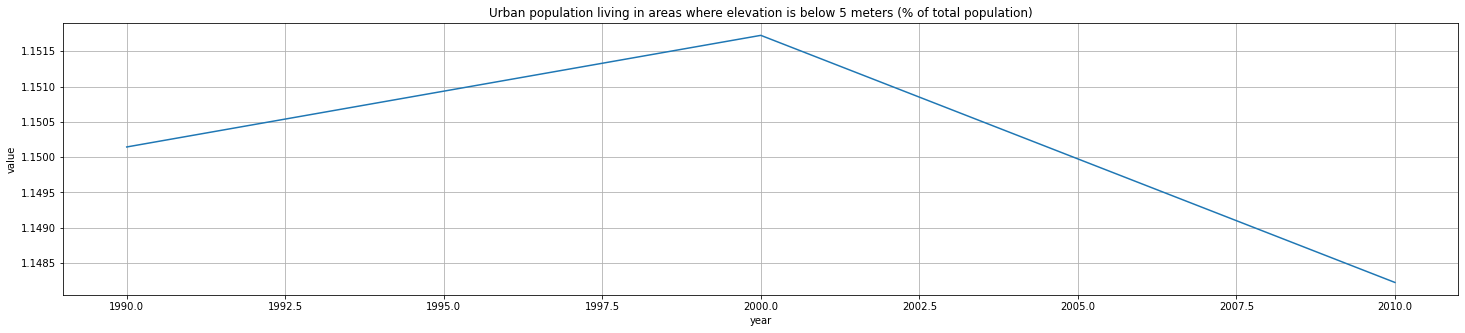

In [338]:
draw2plots_diff('Rural population living in areas where elevation is below 5 meters (% of total population)',
'Urban population living in areas where elevation is below 5 meters (% of total population)')

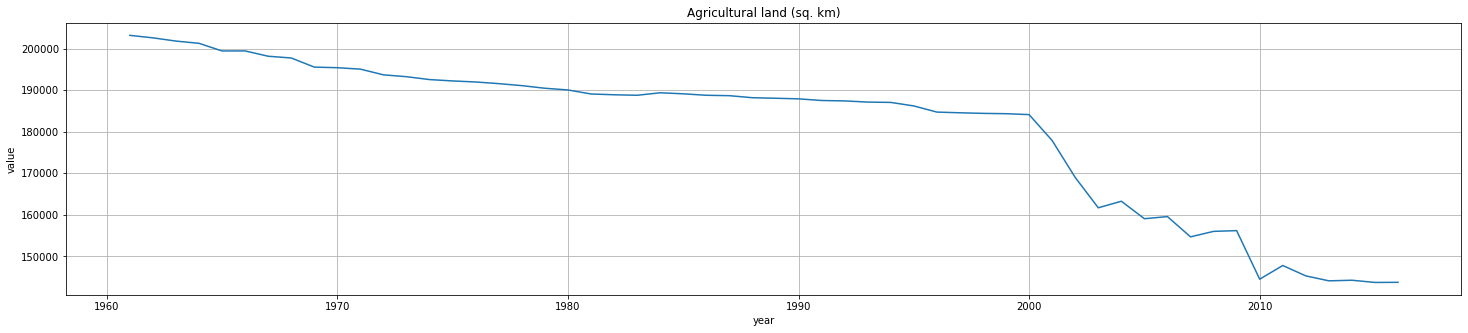

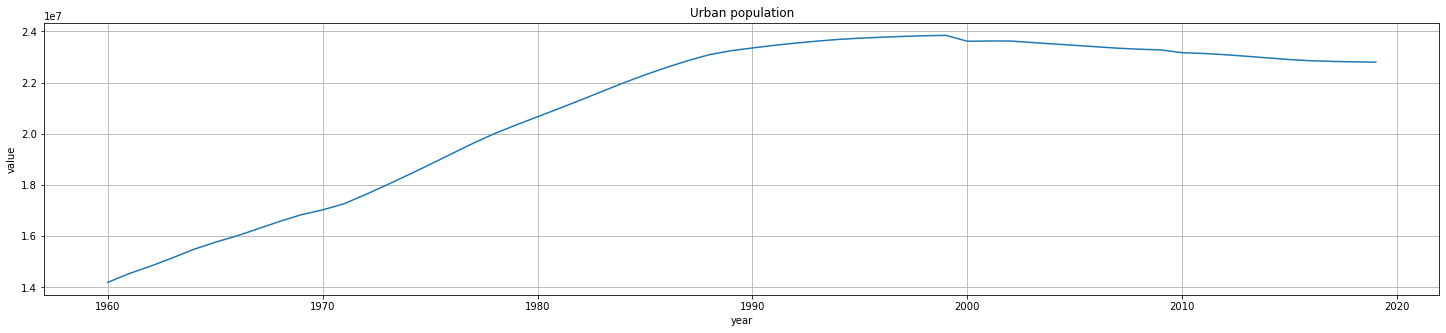

In [339]:
draw2plots_diff('Agricultural land (sq. km)', 'Urban population')

These two plots could signalize that people would sell their agricultural land and move to cities, looking for a job. However,the biggest drop in agricultural land was between 2000-2010, while the urban population being pretty stable then. So maybe they were just changing income means but staying in rural areas or moving to another country.

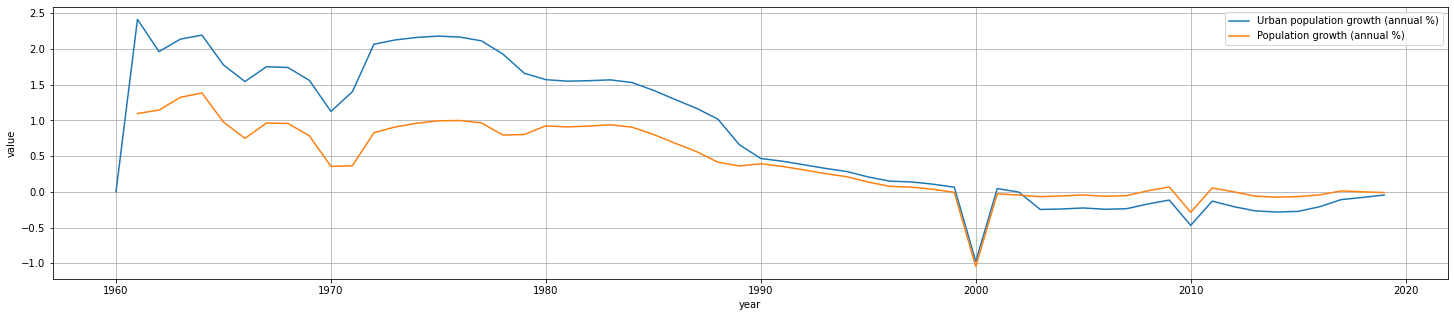

In [340]:
draw2plots('Urban population growth (annual %)','Population growth (annual %)')

As we can see the changes in urban population go along with changes in general population, meaning that this is where most people live because it impacts it so heavily. Over the year the population was decreasing with the biggest drop in 2000, which was the time when a lot of people were migrating to another country looking for a job.

#### gas emissions

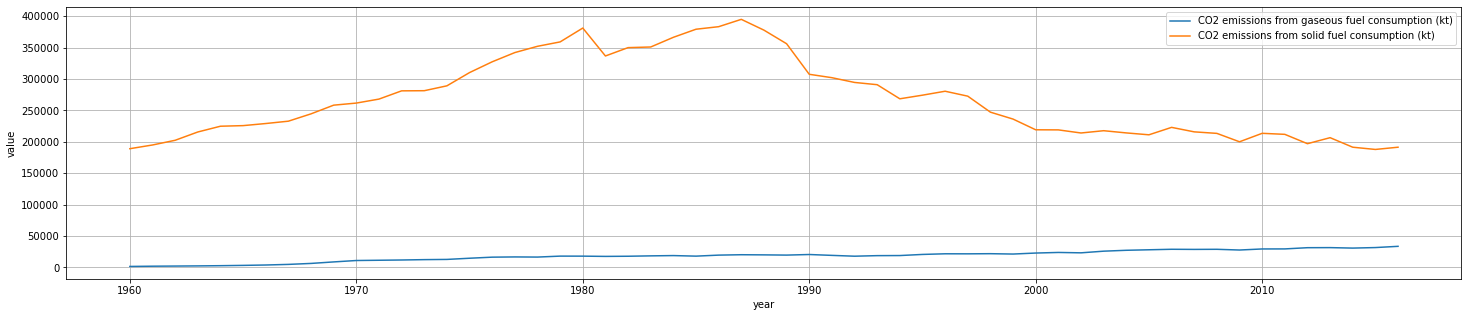

In [341]:
draw2plots('CO2 emissions from gaseous fuel consumption (kt)','CO2 emissions from solid fuel consumption (kt)')

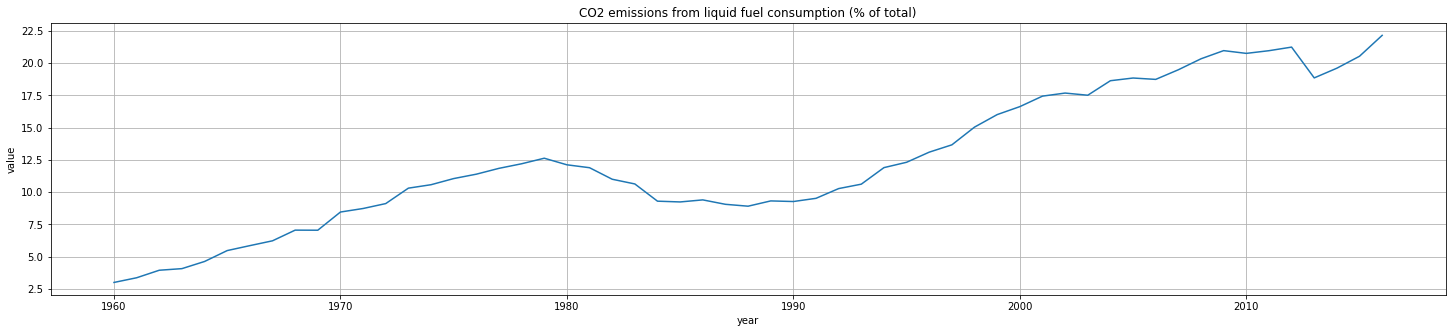

In [342]:
drawplot('CO2 emissions from liquid fuel consumption (% of total)','plot')

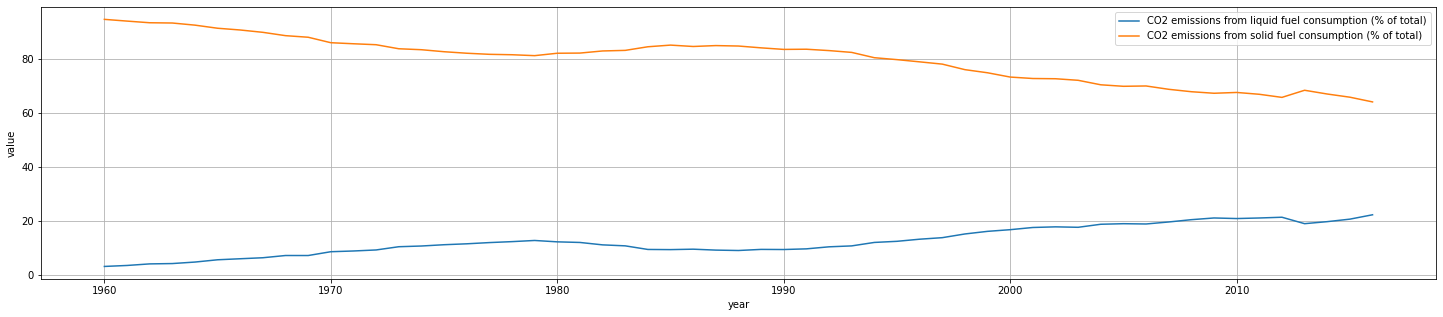

In [343]:
draw2plots('CO2 emissions from liquid fuel consumption (% of total)','CO2 emissions from solid fuel consumption (% of total)')

Source of CO2 emission changed over the years - liquid fuel started to grow while solid fuel diminished, though not a lot.

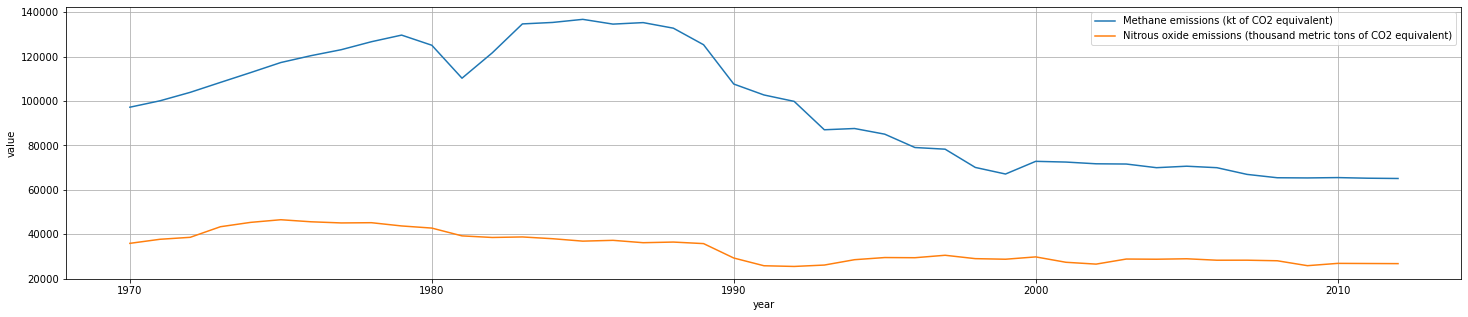

In [344]:
draw2plots('Methane emissions (kt of CO2 equivalent)','Nitrous oxide emissions (thousand metric tons of CO2 equivalent)')

However there was a drop in other gas emission.

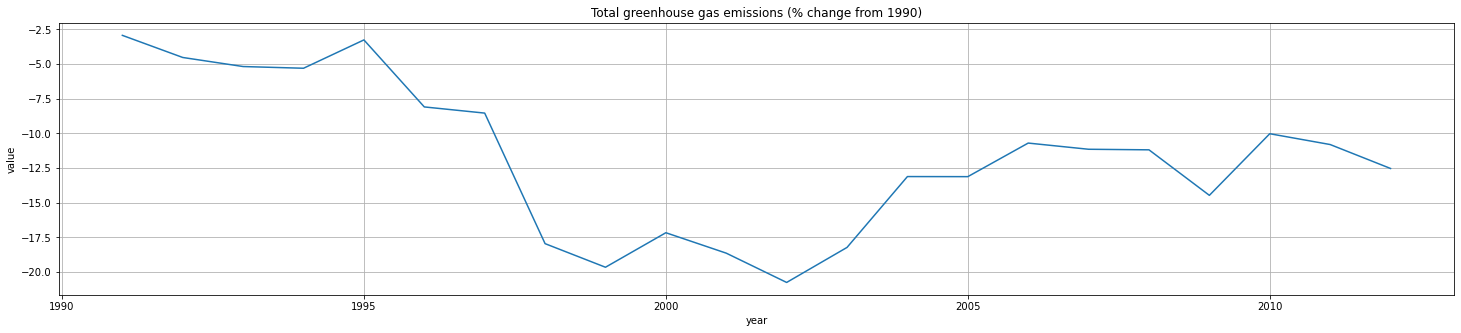

In [345]:
drawplot('Total greenhouse gas emissions (% change from 1990)','plot')

This is most surprising for me - a decrease in greenhouse gasses emission between 1995-2005 and although there was a raise after then, it still was less than before 2000.

## CO2 and cereal yield

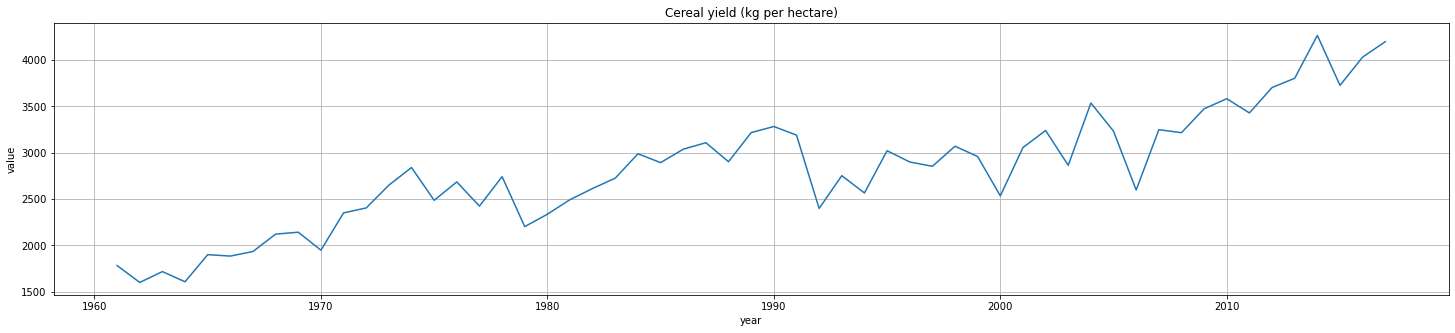

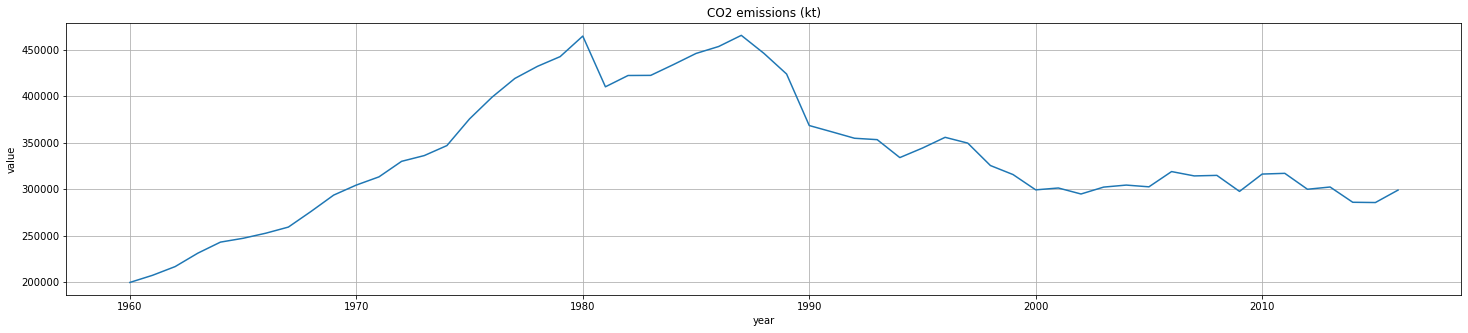

In [346]:
draw2plots_diff('Cereal yield (kg per hectare)','CO2 emissions (kt)')

Apparently CO2 emission intensity was decresaing over the years while cereal yield was in contrary - with each year it was getting bigger and bigger.

Overall the data didn't confirm my thesis - I suspected cereal yield to diminish, but then I wasn't also expecting a drop in CO2 emission.

So with the poppulation decreasing, CO2 emissions going down and cereal yield going up I could say that it's going good, but there are many factors I have to take into reflection. First, the data doesn't include information about temperature, rainfall and natural disasters ocurring. Second, the changes in CO2 emission are local, in our country, but climate is in overall affected by global changes of CO2 emissions. Third, people moving to cities despite the cereal yield growth could simply mean that people are looking for different sources of income, not because nothing grows on fields because of climate changes.

Still, this doesn't mean that climate changes don't affect Poland, it simply means there isn't enough data here to confirm this.

## Regression - predicting CO2 emissions

Data that I have isn't big - maximum of 59 records for an indicator, which is why I don't expect my model to be great, but let's see what's gonna happen.

### simple linear regression

In [347]:
ind_r = 'CO2 emissions from solid fuel consumption (kt)'
df_r = df[df['indicator_name']==ind_r]
X = df_r.year.values.reshape(-1,1)
y = df_r.value.values.reshape(-1)


model = LinearRegression() 
_= model.fit(X, y) 
model

LinearRegression()

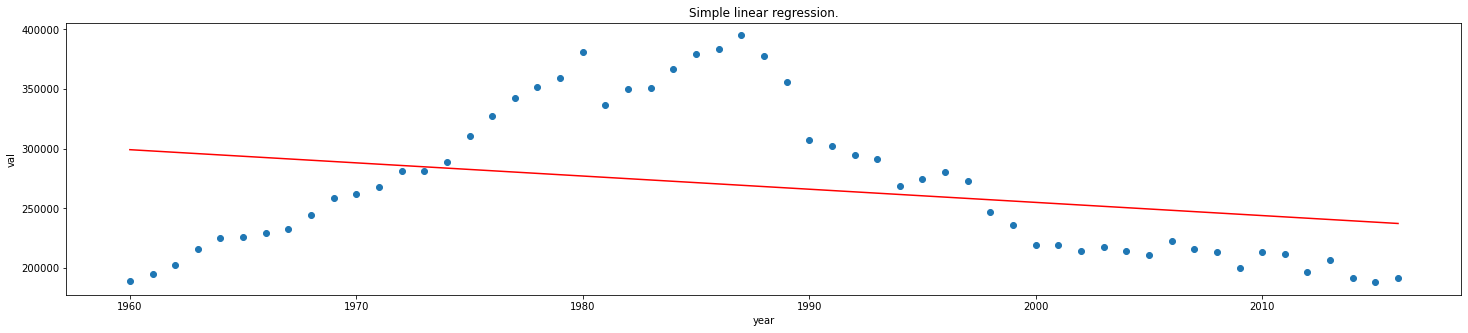

Mean squared error equals: 3575813608.0262065
Model score: 0.08462962975686683


In [348]:
plt.figure(figsize=(25,5))

plt.scatter(df_r.year, df_r.value )
plt.xlabel("year")
plt.ylabel("val")
    
x_model = np.linspace(np.min(X), np.max(X))
y_model = [model.intercept_ + model.coef_*x for x in x_model]
    
plt.plot(x_model, y_model, c="red")
plt.title("Simple linear regression.")
plt.show()

y_pred = model.predict(X)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y)))
print("Model score:",model.score(X, y))
      

This model is pretty terrible, so I decided to try with higher order of polynomial.

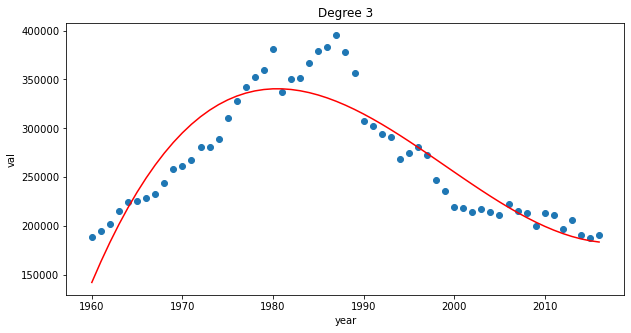

In [355]:
#higher order polynomial =3
plt.figure(figsize=(10,5))
errors = []
errors2 = []

order=3
    
poly = PolynomialFeatures(order, include_bias = False)
X_order = poly.fit_transform(X)
    
    
model = LinearRegression() 
_= model.fit(X_order, y) 
    
y_pred = model.predict(X_order)
errors.append(mean_squared_error(y_pred, y))
errors2.append(model.score(X_order, y))
    
    
plt.scatter(X, y)
plt.xlabel("year")
plt.ylabel("val")
    
x_model = np.linspace(np.min(X), np.max(X), 57)
y_model = [model.intercept_ + np.dot(model.coef_, np.power(x, range(1,order+1))) for x in x_model]
    
plt.plot(x_model, y_model, c="red")
plt.title("Degree " + str(order))

plt.show()

In [358]:
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y)))

Mean squared error equals: 650391833.655035


After trying out different cases, order of 3 seemed to fit best.

<Figure size 1080x1440 with 0 Axes>

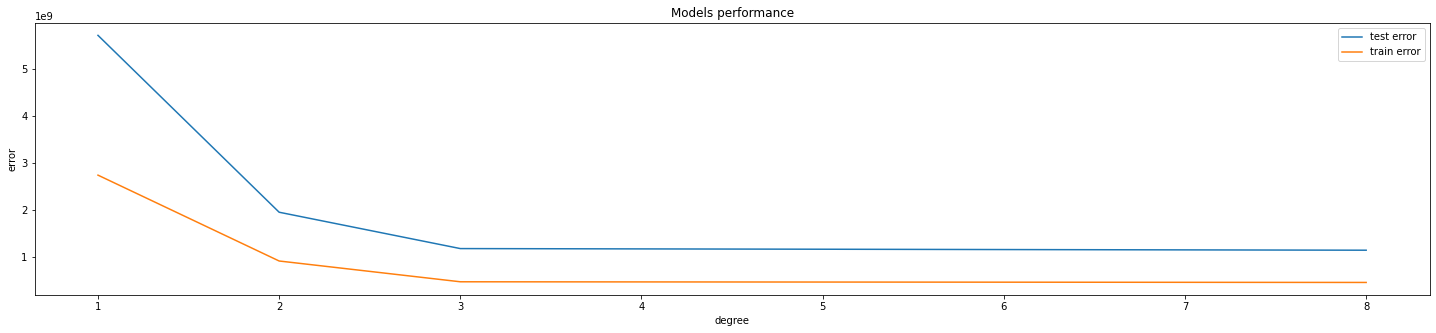

In [361]:
#model performance
plt.figure(figsize=(15,20))
errors = []
errors_train = []

for order in range(1,9):
    
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=41)
    
    model = LinearRegression() 
    _= model.fit(X_train, y_train) 
    
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    errors.append(mean_squared_error(y_pred, y_test))
    errors_train.append(mean_squared_error(y_pred_train, y_train))
    
plt.figure(figsize=(25,5))

plt.plot(range(1,9), errors, label = "test error")
plt.plot(range(1,9), errors_train, label = "train error")

plt.xlabel("degree")
plt.ylabel("error")

plt.title("Models performance")
plt.legend()
plt.show()

The model isn't great, because of little data I had. So, to make it better, more data is necessary so the model was trained better and could predict with smaller error. Also other model perhaps would be better.

## Heatmap

This is just another visualsation of data. Here I chose to chow changes in cO2 emission and urban population change.

In [360]:
#modyfing the data a bit so it goes with a heatmap
data = df.sort_values(by='year')

in1 ='CO2 emissions (kt)'
df1 = data[data['indicator_name']==in1].pivot(index='year', columns='indicator_name', values='value')


in2='Urban population growth (annual %)'
df2 = data[data['indicator_name']==in2].pivot(index='year', columns='indicator_name', values='value')

dfnew = pd.concat([df1,df2])
df2

dfnew2 = df1.join(df2,on='year')
dfnew2.head()

indicator_name,CO2 emissions (kt),Urban population growth (annual %)
year,,
1960.0,199767.159,0.000000
1961.0,207434.856,2.412971
1962.0,216815.042,1.962019
1963.0,231219.018,2.136760
1964.0,243114.766,2.191875


In [353]:
dfnew2.style.background_gradient(cmap ='viridis').set_properties(**{'font-size': '10px'}) 

indicator_name,CO2 emissions from solid fuel consumption (kt),Urban population growth (annual %)
year,,
1960.0,189022.849000,0.000000
1961.0,194941.387000,2.412971
1962.0,202425.734000,1.962019
1963.0,215648.936000,2.136760
1964.0,224823.770000,2.191875
1965.0,225777.190000,1.775473
1966.0,229121.494000,1.542693
1967.0,232858.167000,1.750286
1968.0,244533.895000,1.739116


The lighter the field the bigger value

Urban population growth resulted in bigger CO2 emissions.

## Summary

As I mentioned before, this set of data didn't confirm my thesis that with the growth of CO2 emission,the local climate would change and it would therefore result in smaller crops and people moving to cities in order to look for a job. 

CO2 emissions actually dropped over the years. Poland was emiting a lot more CO2 before. The change could be due to drop in industrial production or more restrictions imposed on polish producers e.g. filters for gas-emiting factories.

 Even though the agricultural land diminished, the crops of cereal were doing fine. If people moved out of villages it was propably due to lack of employment, not the quality and quantity of crops.

I do however see a change in CO2 emission followed by urban population growth, which is natural.

To show changes in local climate we need more data including temperature and rainfall. It's also necessary to remember that climate is affected by global changes in CO2 emissions so more data consisting of that would also be necessery.